# Linear Regression
## Univariate Linear Regression on the California Housing Prices Dataset

### Problem
The goal of this lab is to investigate the correlation between several independent variables (median income, population, number of households) and the median house value in California. By exmaining these individual relationships, it aims to develop a linear regression model for each factor.

### Data Source: [link](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error

#### Load Data

In [39]:
housing = pd.read_csv("data/housing.csv")


### Data Analysis

#### Statistics

In [40]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


| Variable Name | Range | Note |
|---------------|-------|------|
| median_house_value | 14999.00 - 500001.00 | max value is set to 500001 |
| median_income | 0.50 - 15.00 | |
| population | 3.00 - 35682.00| |
| households | 1.00 - 6082.00 | |

#### Scatter Plots

#### Median House Value vs. Median Income

<Axes: xlabel='median_income', ylabel='median_house_value'>

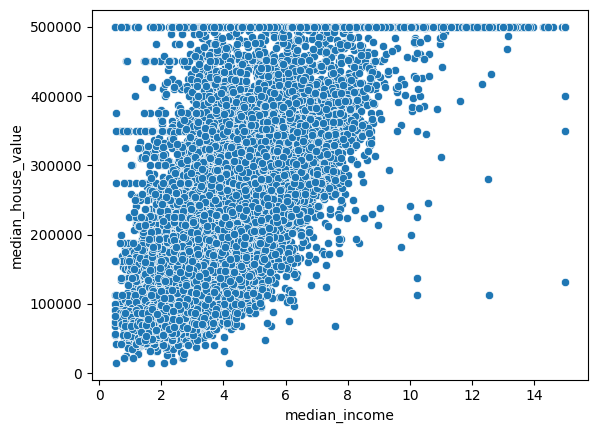

In [41]:
sns.scatterplot(x="median_income", y="median_house_value", data=housing)

There is a general trend of increasing median house value as the median income increases.

#### Median House Value vs. Population

<Axes: xlabel='population', ylabel='median_house_value'>

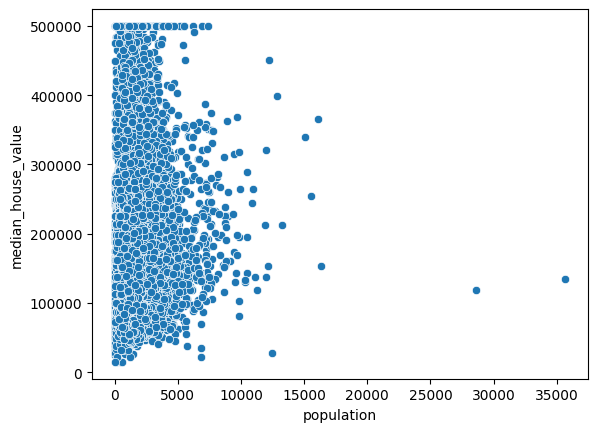

In [42]:
sns.scatterplot(x="population", y="median_house_value", data=housing)

The plot does not show a clear trend of correlation between population and median house value.

#### Median House Value vs. Number of Households

<Axes: xlabel='households', ylabel='median_house_value'>

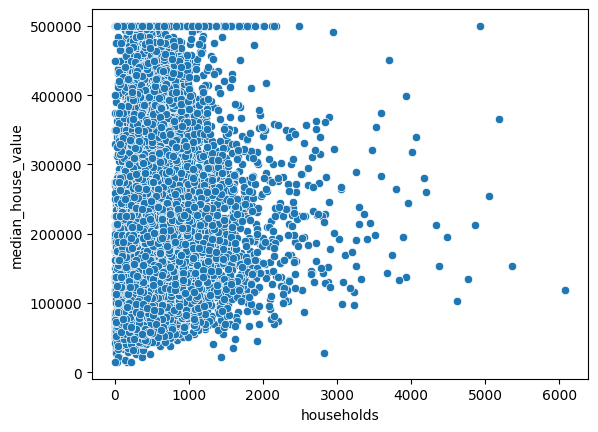

In [43]:
sns.scatterplot(x="households", y="median_house_value", data=housing)

There is a weak relationship between the number of households and median house value.

### Linear Regressions

In [44]:
model_income = linear_model.LinearRegression()
model_population = linear_model.LinearRegression()
model_household = linear_model.LinearRegression()

### Run Three Linear Regressions (fitting)

#### Median House Value vs. Median Income

In [45]:
model_income.fit(housing[["median_income"]], housing["median_house_value"])
print(f"Intercept: {model_income.intercept_}")
print(f"Coefficients: {model_income.coef_}")
print(f"Mean squared error: {mean_squared_error(housing[['median_house_value']], model_income.predict(housing[['median_income']]))}")
print(f"Mean absolute error: {mean_absolute_error(housing[['median_house_value']], model_income.predict(housing[['median_income']]))}")

Intercept: 45085.57670326793
Coefficients: [41793.8492019]
Mean squared error: 7011311502.929527
Mean absolute error: 62625.9337911434


#### Median House Value vs. Population

In [46]:
model_population.fit(housing[["population"]], housing["median_house_value"])
print(f"Intercept: {model_population.intercept_}")
print(f"Coefficients: {model_population.coef_}")
print(f"Mean squared error: {mean_squared_error(housing[['median_house_value']], model_population.predict(housing[['population']]))}")
print(f"Mean absolute error: {mean_absolute_error(housing[['median_house_value']], model_population.predict(housing[['population']]))}")

Intercept: 210436.26207627333
Coefficients: [-2.51175277]
Mean squared error: 13307412412.389355
Mean absolute error: 91153.82009473183


#### Median House Value vs. Number of Households

In [47]:
model_household.fit(housing[["households"]], housing["median_house_value"])
print(f"Intercept: {model_household.intercept_}")
print(f"Coefficients: {model_household.coef_}")
print(f"Mean squared error: {mean_squared_error(housing[['median_house_value']], model_household.predict(housing[['households']]))}")
print(f"Mean absolute error: {mean_absolute_error(housing[['median_house_value']], model_household.predict(housing[['households']]))}")


Intercept: 196928.57716233088
Coefficients: [19.87277516]
Mean squared error: 13257776904.728533
Mean absolute error: 90802.74324318448


#### Summary

| Dependent Variable | Intercept | Slope | Mean Squared Error | Mean Absolute Error |
|--------------------|-----------|-------|--------------------|---------------------|
| Median Income | 45085.58 | 41793.85 | 7011311502.93 | 62625.93 |
| Population | 210436.26 | -2.51 | 13307412412.39 | 91153.82 |
| Households | 196928.58 | 19.87 | 13257776904.73 | 90802.74 |

### Plots with the resulting line of the models

#### Median House Value vs. Median Income

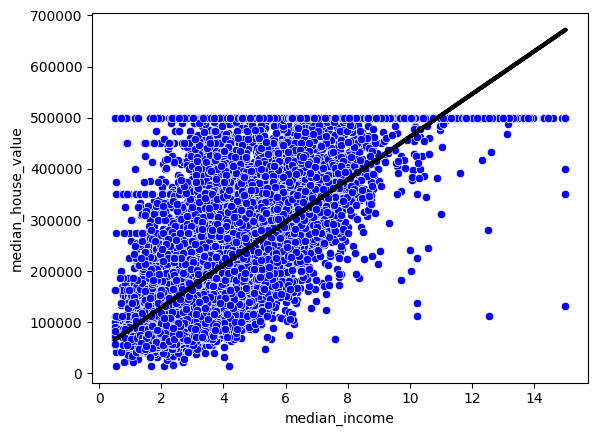

In [48]:
sns.scatterplot(x="median_income", y="median_house_value", data=housing, color="blue")
plt.plot(housing[["median_income"]], model_income.predict(housing[["median_income"]]), color="black", linewidth=3)
plt.show()

#### Median House Value vs. Population

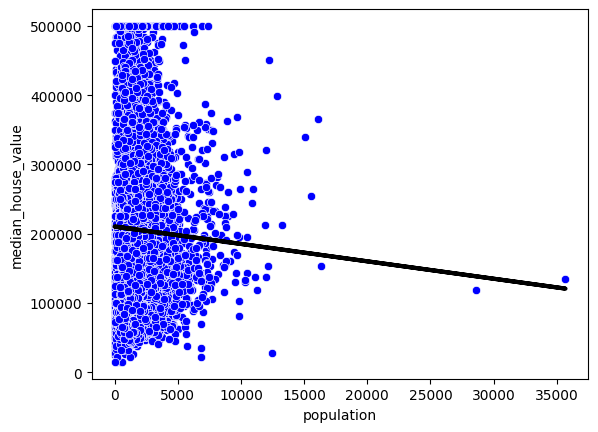

In [49]:
sns.scatterplot(x="population", y="median_house_value", data=housing, color="blue")
plt.plot(housing[["population"]], model_population.predict(housing[["population"]]), color="black", linewidth=3)
plt.show()

#### Median House Value vs. Number of Households

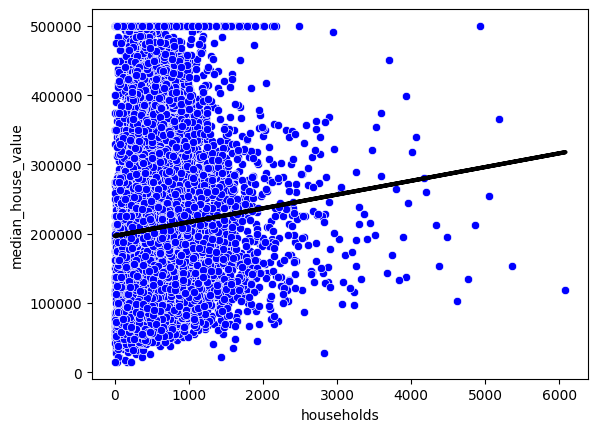

In [50]:
sns.scatterplot(x="households", y="median_house_value", data=housing, color="blue")
plt.plot(housing[["households"]], model_household.predict(housing[["households"]]), color="black", linewidth=3)
plt.show()

### Conclusion

The housing prices in California appear to have a positive correlation with the median income of residents, and the data suggests that the model fits well within this context. However, for more accurate results, it may be necessary to adjust the maximum housing price value set in the current dataset. On the other hand, in the case of population and households, most of the data is concentrated within specific intervals, and the correlation with housing prices is not clear. Particularly with population, it is evident that the influence of outliers is significant, leading to a model that does not fit adequately.